# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [12]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Importing the necessary libraries

In [14]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [15]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns",300)
pd.set_option('display.max_rows',300)

In [16]:
!pip install gensim

In [243]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS

from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

[nltk_data] Downloading package punkt to /Users/raja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/raja/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [19]:
# Import the first file - True.csv
fake=pd.read_csv("Fake.csv")
# Import the second file - Fake.csv
true=pd.read_csv("True.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [22]:
# Inspect the DataFrame with True News to understand the given data
print("Preview of True News DataFrame:")
display(true.head())

print("Structure of True News DataFrame:")
true.info()

print("\n Summary statistics of True News DataFrame:")
display(true.describe(include='all'))

print("\n Missing values in each column:")
print(true.isnull().sum())

print("\n Number of duplicate rows:")
print(true.duplicated().sum())

Preview of True News DataFrame:


,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


Structure of True News DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB

 Summary statistics of True News DataFrame:


,title,text,date
count,21417,21417,21417
unique,20826,21192,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,"December 20, 2017"
freq,14,8,182



 Missing values in each column:
title    0
text     0
date     0
dtype: int64

 Number of duplicate rows:
217


In [23]:
# Inspect the DataFrame with Fake News to understand the given data
print("Preview of Fake News Dataset:")
display(fake.head())

print("\n Structure of Fake News DataFrame:")
fake.info()

print("\n Statistical Summary of Fake News Dataset:")
display(fake.describe(include='all'))

Preview of Fake News Dataset:


,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"



 Structure of Fake News DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB

 Statistical Summary of Fake News Dataset:


,title,text,date
count,23502,23502,23481
unique,17914,17466,1692
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,"May 10, 2017"
freq,6,626,46


In [24]:
# Print the column details for True News DataFrame
print("Preview of True News Dataset:")
display(true.head())

print("\n Structure of True News DataFrame:")
true.info()

print("\n Statistical Summary of True News Dataset:")
display(true.describe(include='all'))

Preview of True News Dataset:


,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"



 Structure of True News DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB

 Statistical Summary of True News Dataset:


,title,text,date
count,21417,21417,21417
unique,20826,21192,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,"December 20, 2017"
freq,14,8,182


In [25]:
# Print the column details for Fake News Dataframe
print("Column names in Fake News DataFrame:", list(fake.columns))
print("Column names in True News DataFrame:", list(true.columns))

Column names in Fake News DataFrame: ['title', 'text', 'date']
Column names in True News DataFrame: ['title', 'text', 'date']


In [26]:
# Print the column names of both DataFrames
print("Column names in Fake News DataFrame:")
print(fake.columns.tolist())

print("\n Column names in True News DataFrame:")
print(true.columns.tolist())

Column names in Fake News DataFrame:
['title', 'text', 'date']

 Column names in True News DataFrame:
['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [28]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true['label']=1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake['label']=0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [30]:
# Combine the true and fake news DataFrames into a single DataFrame
merged=pd.concat([fake,true],ignore_index=True)

In [31]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("First 5 rows of the combined DataFrame:")
display(merged.head())

First 5 rows of the combined DataFrame:


,title,text,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",0


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [33]:
# Check Presence of Null Values
print("Null values in each column of merged:")
print(merged.isnull().sum())

Null values in each column of merged:
title    21
text     21
date     42
label     0
dtype: int64


In [34]:
# Handle Rows with Null Values
merged.dropna(subset=['title','text'],inplace=True)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [36]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
merged['news']=merged['title'] + " " + merged['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
merged.drop(columns=['title','text','date'],inplace=True)

# Display the first 5 rows of the updated DataFrame to check the result
print("✔️ Data Preparation Complete")
print(merged.info())
print(merged.head())

✔️ Data Preparation Complete
<class 'pandas.core.frame.DataFrame'>
Index: 44919 entries, 0 to 44939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   44919 non-null  int64 
 1   news    44919 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
None
   label                                               news
0      0   Donald Trump Sends Out Embarrassing New Year’...
1      0   Drunk Bragging Trump Staffer Started Russian ...
2      0   Sheriff David Clarke Becomes An Internet Joke...
3      0   Trump Is So Obsessed He Even Has Obama’s Name...
4      0   Pope Francis Just Called Out Donald Trump Dur...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [40]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

# Add 'news_label' column to the new dataframe for topic identification
processed=merged.copy()

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [42]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers
def clean_text(text):
    text=re.sub(r"http\S+|www\S+|https\S+",'',text,flags=re.MULTILINE)
    text=re.sub(r'\@\w+|\#','',text)
    text=re.sub(r'[^a-zA-Z\s]','',text)
    text=text.lower()
    text=re.sub(r'\s+',' ',text).strip()
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [44]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
processed['clean_news']=processed['news'].apply(clean_text)
processed[['news','clean_news']].head()

,news,clean_news
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump sends out embarrassing new years ...
1,Drunk Bragging Trump Staffer Started Russian ...,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,trump is so obsessed he even has obamas name c...
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis just called out donald trump duri...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [47]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
nlp=spacy.load("en_core_web_sm")

def lemmatize_nouns(text):
    doc=nlp(text)
    nouns=[token.lemma_ for token in doc 
             if token.pos_ in ['NOUN'] and token.text not in STOP_WORDS]
    return ' '.join(nouns)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [49]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
processed['lemmatized_news']=processed['clean_news'].apply(lemmatize_nouns)
processed[['clean_news','lemmatized_news']].head()

,clean_news,lemmatized_news
0,donald trump sends out embarrassing new years ...,year eve message year shout enemy hater news m...
1,drunk bragging trump staffer started russian c...,bragging trump staffer collusion investigation...
2,sheriff david clarke becomes an internet joke ...,internet joke people eye homeland security sec...
3,trump is so obsessed he even has obamas name c...,trump website image day day day row reality st...
4,pope francis just called out donald trump duri...,trump speech day message pope message day memb...


### Save the Cleaned data as a csv file (Recommended)

In [51]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")

processed.to_csv("clean_news_data.csv",index=False)
print("✔️ Preprocessed data saved as 'clean_news_data.csv'")

✔️ Preprocessed data saved as 'clean_news_data.csv'


In [52]:
# Check the first few rows of the DataFrame
print("First few rows of processed_df:")
display(processed.head())

First few rows of processed_df:


,label,news,clean_news,lemmatized_news
0,0,Donald Trump Sends Out Embarrassing New Year’...,donald trump sends out embarrassing new years ...,year eve message year shout enemy hater news m...
1,0,Drunk Bragging Trump Staffer Started Russian ...,drunk bragging trump staffer started russian c...,bragging trump staffer collusion investigation...
2,0,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clarke becomes an internet joke ...,internet joke people eye homeland security sec...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...,trump is so obsessed he even has obamas name c...,trump website image day day day row reality st...
4,0,Pope Francis Just Called Out Donald Trump Dur...,pope francis just called out donald trump duri...,trump speech day message pope message day memb...


In [53]:
# Check the dimensions of the DataFrame
print("Dimensions of processed_df:")
print(processed.shape)

Dimensions of processed_df:
(44919, 4)


In [54]:
# Check the number of non-null entries and data types of each column
print("Non-null entries and data types in processed_df:")
processed.info()

Non-null entries and data types in processed_df:
<class 'pandas.core.frame.DataFrame'>
Index: 44919 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   label            44919 non-null  int64 
 1   news             44919 non-null  object
 2   clean_news       44919 non-null  object
 3   lemmatized_news  44919 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [56]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
X=processed['lemmatized_news']
y=processed['label']

In [57]:
# Perform the stratified split to maintain the label distribution
X_train,X_val,y_train,y_val=train_test_split(
    X,y,test_size=0.2,stratify=y,random_state=42
)

#Wrap into DataFrames for the future processing
train=pd.DataFrame({'text':X_train,'label':y_train}).reset_index(drop=True)
val=pd.DataFrame({'text':X_val,'label':y_val}).reset_index(drop=True)

#Saving to CSV file
train.to_csv("train_data.csv",index=False)
val.to_csv("val_data.csv",index=False)

#Summary of the data split
print("✔️ Data split complete.")
print(f"Training samples:{len(train)}")
print(f"Validation samples:{len(val)}")
train.head()

✔️ Data split complete.
Training samples:35935
Validation samples:8984


,text,label
0,celebration sport stadium woman time th annive...,1
1,director look face video witch hunter grilling...,0
2,email possibility ethic wash reuter email wiki...,1
3,trump japan toast bromance twoday summit wrap ...,1
4,wire risk consultant lecturer degree politic a...,0


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [61]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train['clean_length']=train['text'].apply(lambda x:len(x))

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

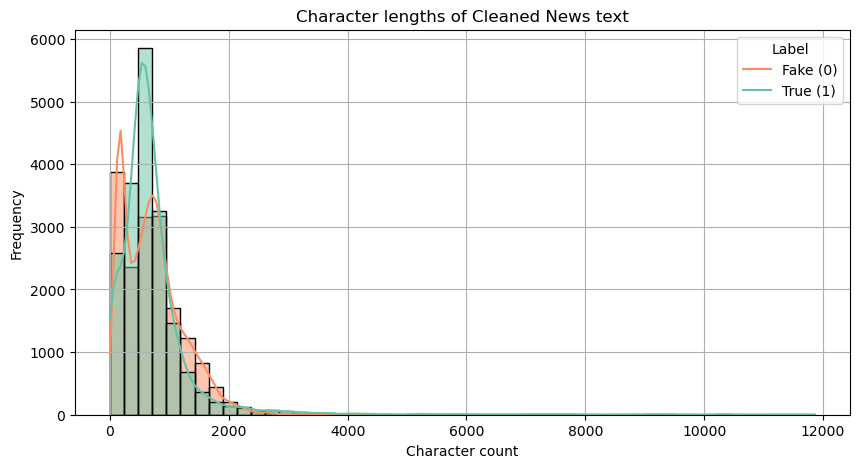

In [63]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed
#Histogram plot
plt.figure(figsize=(10,5))
sns.histplot(data=train,x='clean_length',hue='label',bins=50,kde=True,palette='Set2')
plt.title("Character lengths of Cleaned News text")
plt.xlabel("Character count")
plt.ylabel("Frequency")
plt.legend(title='Label',labels=['Fake (0)','True (1)'])
plt.grid(True)
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [66]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
def top_words(texts,n=40):
    all_words=' '.join(texts).split()
    word_freq=Counter(all_words)
    return word_freq.most_common(n)
    
# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News

true_words=top_words(train[train['label']==1]['text'])

true=pd.DataFrame(true_words,columns=['word','freq'])

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [68]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
fake_words=top_words(train[train['label']==0]['text'])

fake=pd.DataFrame(fake_words,columns=['word','freq'])

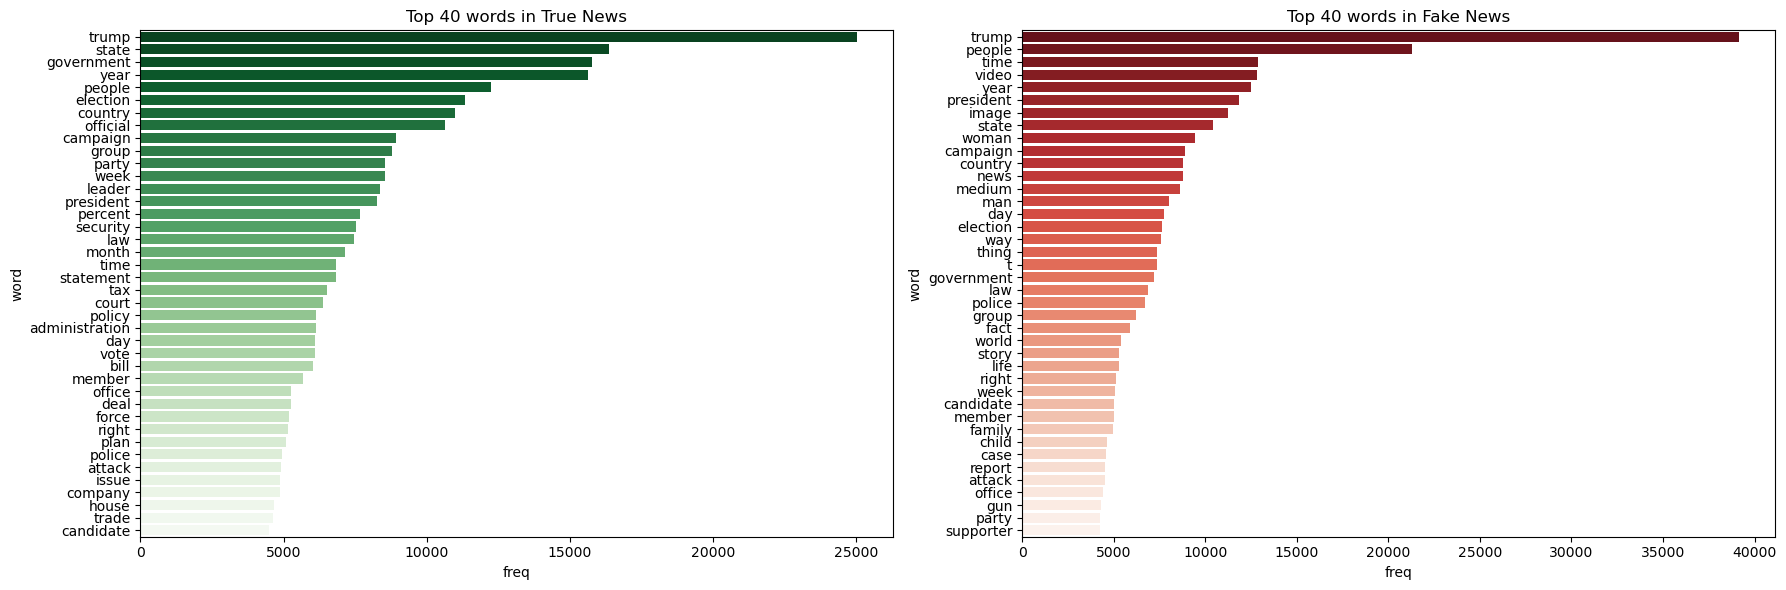

In [69]:
fig,axes=plt.subplots(1,2,figsize=(18,6))
sns.barplot(data=true,x='freq',y='word',ax=axes[0],palette='Greens_r')
axes[0].set_title("Top 40 words in True News")

sns.barplot(data=fake,x='freq',y='word',ax=axes[1],palette='Reds_r')
axes[1].set_title("Top 40 words in Fake News")

plt.tight_layout()
plt.show()

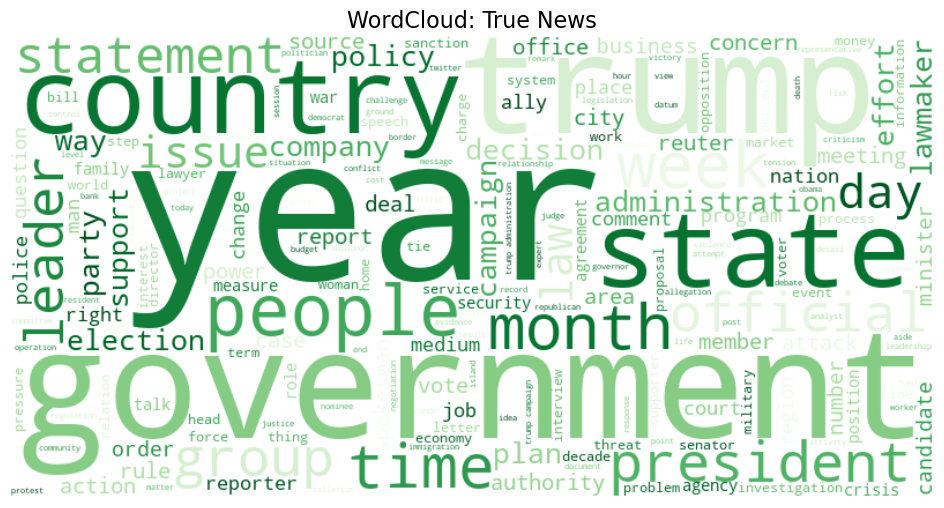

In [260]:
# Combine all words in true news training data
true_words_text=' '.join(train[train['label']==1]['text'].astype(str))

wordcloud_true=WordCloud(width=800,height=400,background_color='white',stopwords=STOPWORDS,colormap='Greens').generate(true_words_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud: True News", fontsize=16)
plt.show()

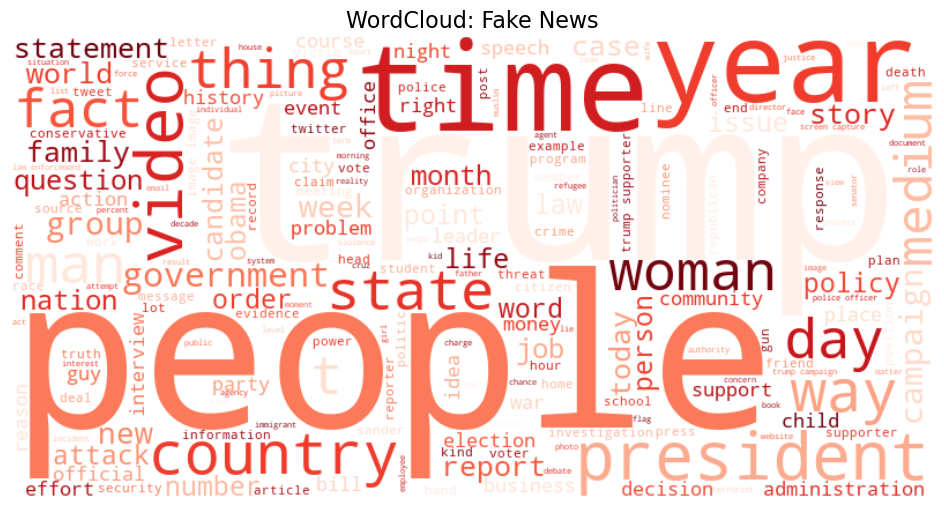

In [264]:
# Combine all words in true news training data
fake_words_text=' '.join(train[train['label']==0]['text'].astype(str))

wordcloud_fake=WordCloud(width=800,height=400,background_color='white',stopwords=STOPWORDS,colormap='Reds').generate(fake_words_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud: Fake News", fontsize=16)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [72]:
# Write a function to get the specified top n-grams
def top_ngrams(corpus,ngram_range=(1,1),n=10):
    vectorizer=CountVectorizer(ngram_range=ngram_range)
    X=vectorizer.fit_transform(corpus)
    sum_words=X.sum(axis=0)
    
    words_freq=[(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
    return words_freq[:n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [74]:
# Handle NaN values in the text data
train.dropna(subset=['text'],inplace=True)

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

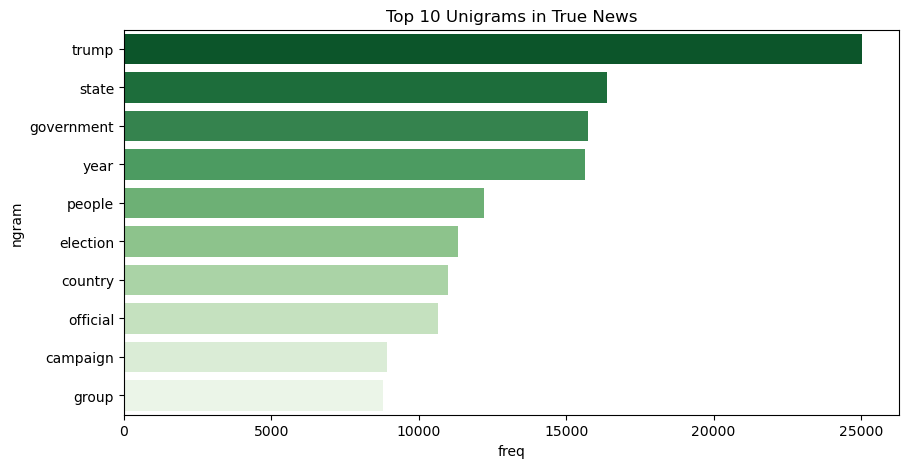

In [77]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_texts=train[train['label']==1]['text']

true_unigrams=top_ngrams(true_texts,(1,1))
true_uni=pd.DataFrame(true_unigrams,columns=['ngram','freq'])
plt.figure(figsize=(10,5))
sns.barplot(data=true_uni,x='freq',y='ngram',palette='Greens_r')
plt.title("Top 10 Unigrams in True News")
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



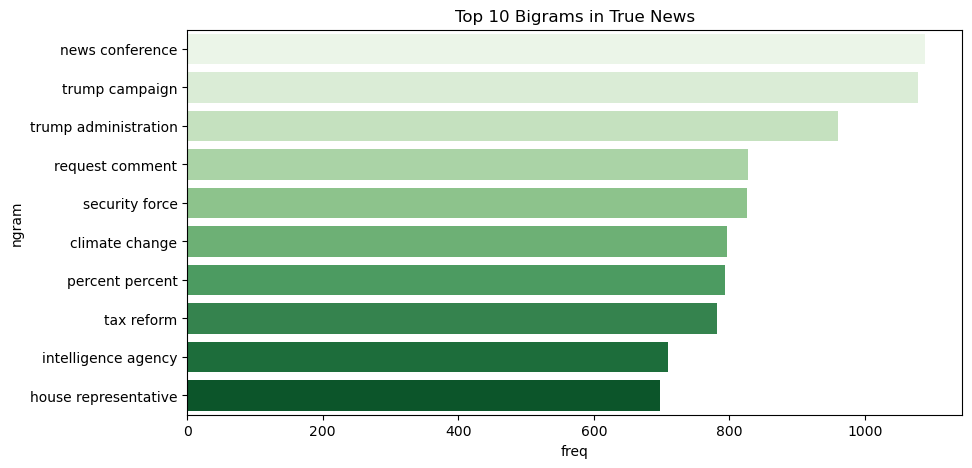

In [79]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_bigrams=top_ngrams(true_texts,(2,2))
true_bi=pd.DataFrame(true_bigrams,columns=['ngram','freq'])
plt.figure(figsize=(10,5))
sns.barplot(data=true_bi,x='freq',y='ngram',palette='Greens')
plt.title("Top 10 Bigrams in True News")
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



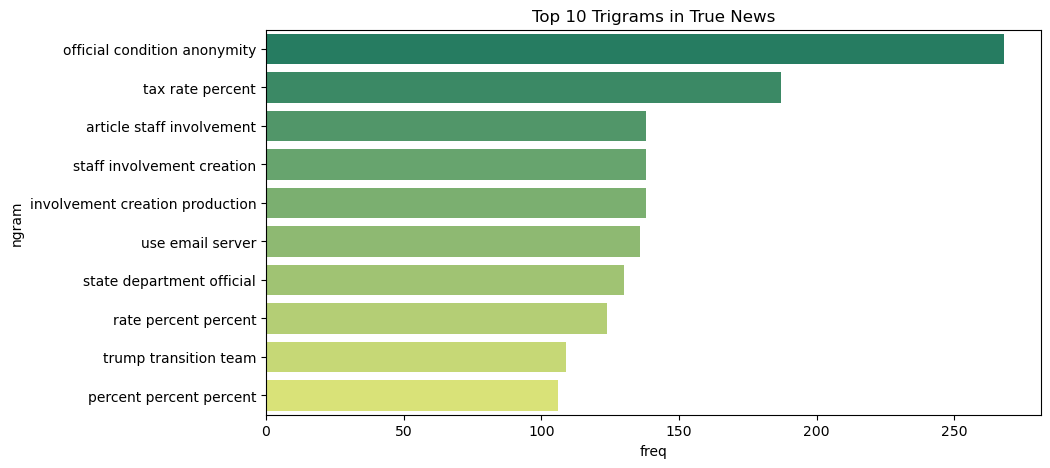

In [81]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_trigrams=top_ngrams(true_texts,(3,3))
true_tri=pd.DataFrame(true_trigrams,columns=['ngram','freq'])
plt.figure(figsize=(10,5))
sns.barplot(data=true_tri,x='freq',y='ngram',palette='summer')
plt.title("Top 10 Trigrams in True News")
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

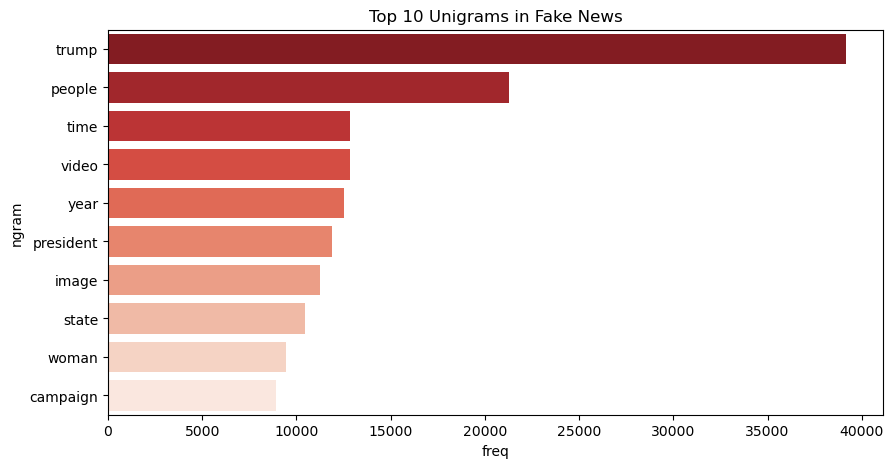

In [84]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_texts=train[train['label']==0]['text']

fake_unigrams=top_ngrams(fake_texts,(1,1))
fake_uni=pd.DataFrame(fake_unigrams,columns=['ngram','freq'])
plt.figure(figsize=(10,5))
sns.barplot(data=fake_uni,x='freq',y='ngram',palette='Reds_r')
plt.title("Top 10 Unigrams in Fake News")
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



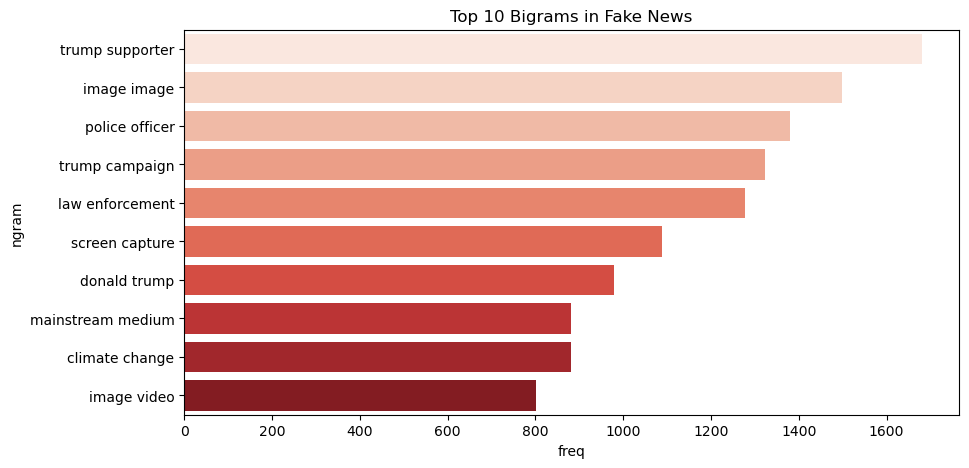

In [86]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bigrams=top_ngrams(fake_texts,(2,2))
fake_bi=pd.DataFrame(fake_bigrams,columns=['ngram','freq'])
plt.figure(figsize=(10,5))
sns.barplot(data=fake_bi,x='freq',y='ngram',palette='Reds')
plt.title("Top 10 Bigrams in Fake News")
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



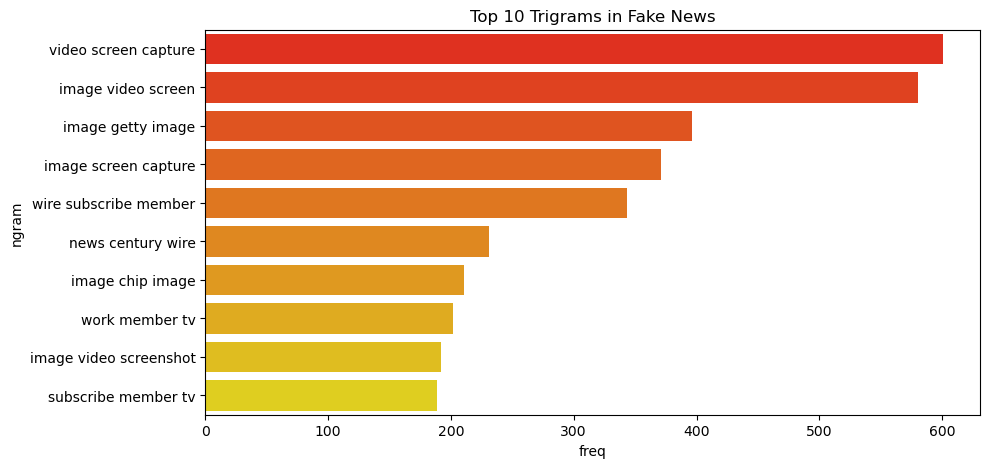

In [88]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_trigrams=top_ngrams(fake_texts,(3,3))
fake_tri=pd.DataFrame(fake_trigrams,columns=['ngram','freq'])
plt.figure(figsize=(10,5))
sns.barplot(data=fake_tri,x='freq',y='ngram',palette='autumn')
plt.title("Top 10 Trigrams in Fake News")
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [92]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val['clean_length']=val['text'].apply(lambda x:len(str(x)))

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

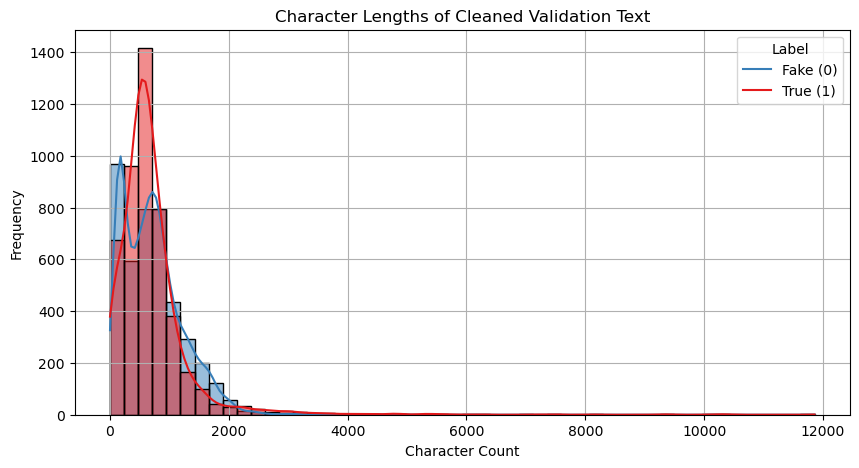

In [94]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(10,5))
sns.histplot(data=val,x='clean_length',hue='label',bins=50,kde=True,palette='Set1')
plt.title("Character Lengths of Cleaned Validation Text")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.legend(title='Label',labels=['Fake (0)','True (1)'])
plt.grid(True)
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [97]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News
def top_words(texts,n=40):
    all_words=' '.join(texts).split()
    word_freq=Counter(all_words)
    return word_freq.most_common(n)

true_words_val=top_words(val[val['label']==1]['text'])

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

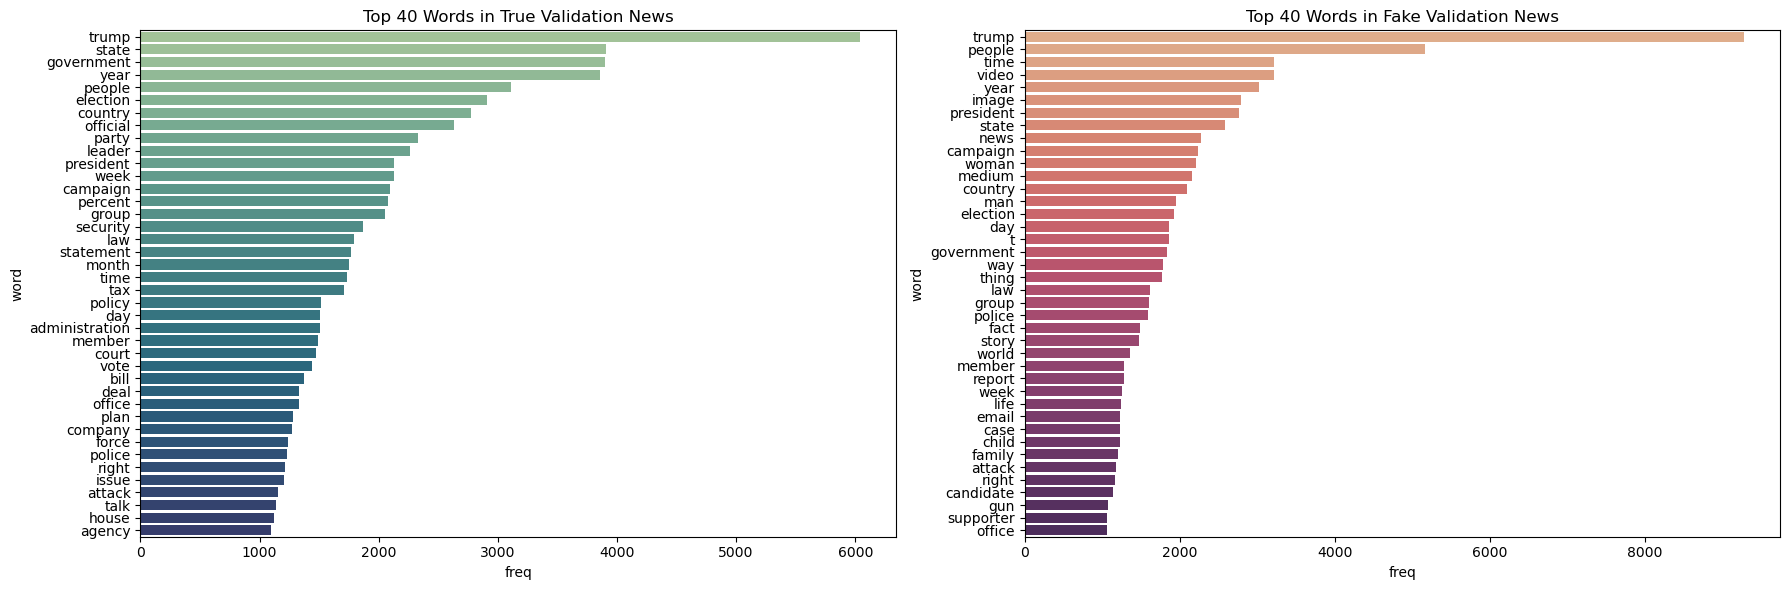

In [99]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News
fake_words_val=top_words(val[val['label']==0]['text'])

fig,axes=plt.subplots(1,2,figsize=(18,6))
sns.barplot(data=pd.DataFrame(true_words_val,columns=['word','freq']),x='freq',y='word',ax=axes[0],palette='crest')
axes[0].set_title("Top 40 Words in True Validation News")

sns.barplot(data=pd.DataFrame(fake_words_val,columns=['word','freq']),x='freq',y='word',ax=axes[1],palette='flare')
axes[1].set_title("Top 40 Words in Fake Validation News")

plt.tight_layout()
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [102]:
## Write a function to get the specified top n-grams
val.dropna(subset=['text'],inplace=True)

true_texts_val=val[val['label']==1]['text']

##### 5.3.2 Handle the NaN values

In [104]:
## First handle NaN values in the text data
true_texts_val=val[val['label']==1]['text']

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

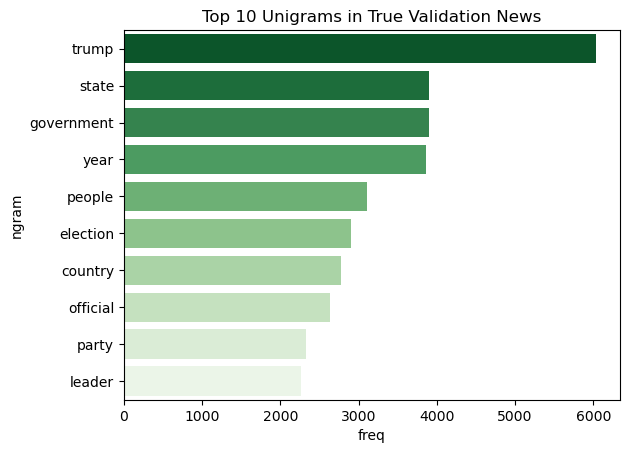

In [107]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_uni_val=top_ngrams(true_texts_val,(1,1))
sns.barplot(data=pd.DataFrame(true_uni_val,columns=['ngram','freq']),x='freq',y='ngram',palette='Greens_r')
plt.title("Top 10 Unigrams in True Validation News")
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

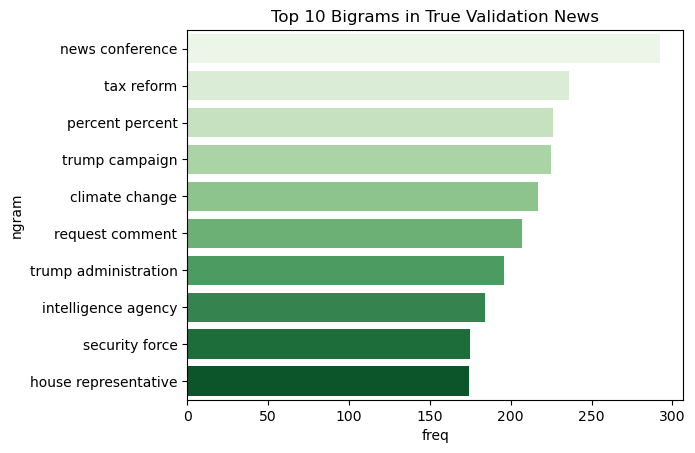

In [109]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_bi_val=top_ngrams(true_texts_val,(2,2))
sns.barplot(data=pd.DataFrame(true_bi_val,columns=['ngram','freq']),x='freq',y='ngram',palette='Greens')
plt.title("Top 10 Bigrams in True Validation News")
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

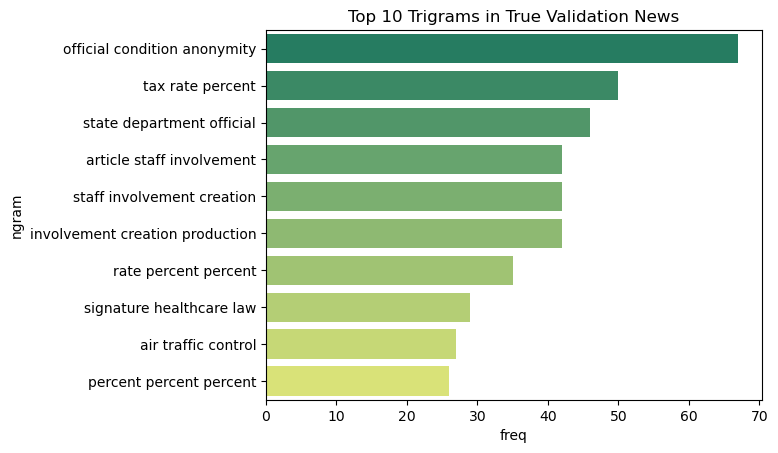

In [111]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_tri_val=top_ngrams(true_texts_val,(3,3))
sns.barplot(data=pd.DataFrame(true_tri_val,columns=['ngram','freq']),x='freq',y='ngram',palette='summer')
plt.title("Top 10 Trigrams in True Validation News")
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

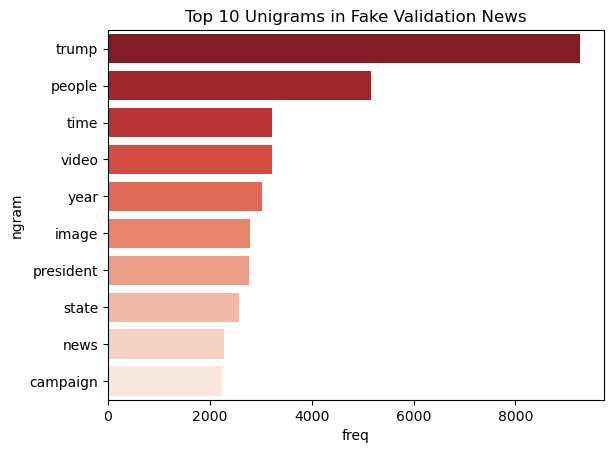

In [114]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_texts_val=val[val['label']==0]['text']

fake_uni_val=top_ngrams(fake_texts_val,(1,1))
sns.barplot(data=pd.DataFrame(fake_uni_val,columns=['ngram','freq']),x='freq',y='ngram',palette='Reds_r')
plt.title("Top 10 Unigrams in Fake Validation News")
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

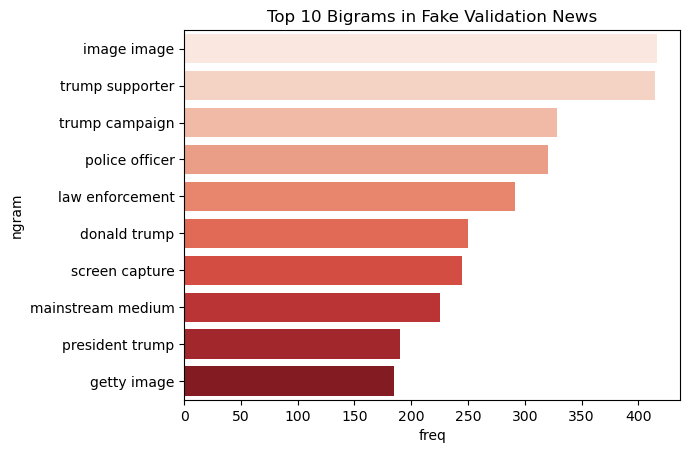

In [116]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bi_val=top_ngrams(fake_texts_val,(2,2))
sns.barplot(data=pd.DataFrame(fake_bi_val,columns=['ngram','freq']),x='freq',y='ngram',palette='Reds')
plt.title("Top 10 Bigrams in Fake Validation News")
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

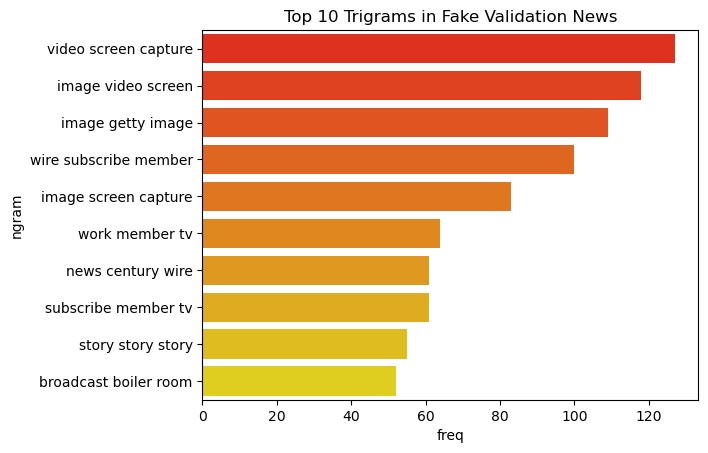

In [118]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_tri_val=top_ngrams(fake_texts_val,(3,3))
sns.barplot(data=pd.DataFrame(fake_tri_val,columns=['ngram','freq']),x='freq',y='ngram',palette='autumn')
plt.title("Top 10 Trigrams in Fake Validation News")
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [121]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
train_corpus=[word_tokenize(text) for text in train['text']]

w2v_model=Word2Vec(
    sentences=train_corpus,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1
)

w2v_model.train(train_corpus,total_examples=len(train_corpus),epochs=10)

print("✔️ Word2Vec model trained")

✔️ Word2Vec model trained


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [123]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def doc_vector(text):
    words=word_tokenize(text)
    words=[word for word in words if word in w2v_model.wv]
    if len(words)>=1:
        return np.mean(w2v_model.wv[words],axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

## Extract the target variable for the training data and validation data
X_train_vecs=np.array([doc_vector(text) for text in train['text']])
X_val_vecs=np.array([doc_vector(text) for text in val['text']])

y_train_vecs=train['label'].values
y_val_vecs=val['label'].values

print("✔️ Documents vectorized using Word2Vec")
print(f"Training vectors shape:{X_train_vecs.shape}")
print(f"Validation vectors shape:{X_val_vecs.shape}")

✔️ Documents vectorized using Word2Vec
Training vectors shape:(35935, 100)
Validation vectors shape:(8984, 100)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [129]:
## Initialise Logistic Regression model

## Train Logistic Regression model on training data

## Predict on validation data
lr_model=LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(X_train_vecs,y_train_vecs)

y_pred_lr=lr_model.predict(X_val_vecs)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [131]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
acc =accuracy_score(y_val_vecs,y_pred_lr)
prec=precision_score(y_val_vecs,y_pred_lr)
rec =recall_score(y_val_vecs,y_pred_lr)
f1  =f1_score(y_val_vecs,y_pred_lr)

In [132]:
# Classification Report
print("Logistic Regression Results:")
print(f"✔️ Accuracy:  {acc:.4f}")
print(f"✔️ Precision: {prec:.4f}")
print(f"✔️ Recall:    {rec:.4f}")
print(f"✔️ F1 Score:  {f1:.4f}")
print("\nDetailed Report:\n")
print(classification_report(y_val_vecs,y_pred_lr,target_names=["Fake","True"]))

Logistic Regression Results:
✔️ Accuracy:  0.9383
✔️ Precision: 0.9289
✔️ Recall:    0.9428
✔️ F1 Score:  0.9358

Detailed Report:

              precision    recall  f1-score   support

        Fake       0.95      0.93      0.94      4701
        True       0.93      0.94      0.94      4283

    accuracy                           0.94      8984
   macro avg       0.94      0.94      0.94      8984
weighted avg       0.94      0.94      0.94      8984



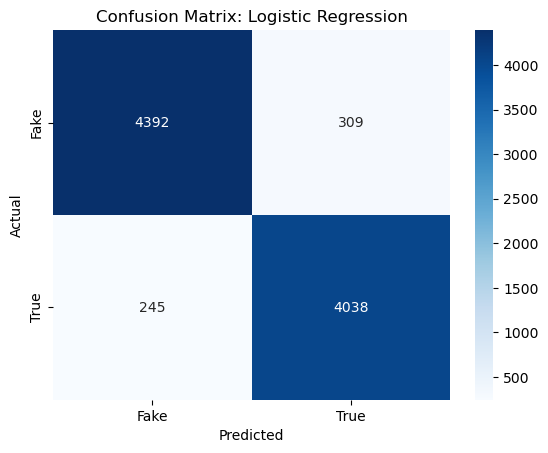

In [133]:
#Confusion Matrix
cm=confusion_matrix(y_val_vecs,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Fake","True"],yticklabels=["Fake","True"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [136]:
## Initialise Decision Tree model

## Train Decision Tree model on training data
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vecs,y_train_vecs)

## Predict on validation data
y_pred_dt=dt_model.predict(X_val_vecs)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [138]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
acc_dt =accuracy_score(y_val_vecs,y_pred_dt)
prec_dt=precision_score(y_val_vecs,y_pred_dt)
rec_dt=recall_score(y_val_vecs,y_pred_dt)
f1_dt=f1_score(y_val_vecs,y_pred_dt)

In [139]:
# Classification Report
print("Decision Tree Results:")
print(f"✔️ Accuracy:  {acc_dt:.4f}")
print(f"✔️ Precision: {prec_dt:.4f}")
print(f"✔️ Recall:    {rec_dt:.4f}")
print(f"✔️ F1 Score:  {f1_dt:.4f}")
print("\nDetailed Report:\n")
print(classification_report(y_val_vecs,y_pred_dt,target_names=["Fake","True"]))

Decision Tree Results:
✔️ Accuracy:  0.8812
✔️ Precision: 0.8892
✔️ Recall:    0.8578
✔️ F1 Score:  0.8732

Detailed Report:

              precision    recall  f1-score   support

        Fake       0.87      0.90      0.89      4701
        True       0.89      0.86      0.87      4283

    accuracy                           0.88      8984
   macro avg       0.88      0.88      0.88      8984
weighted avg       0.88      0.88      0.88      8984



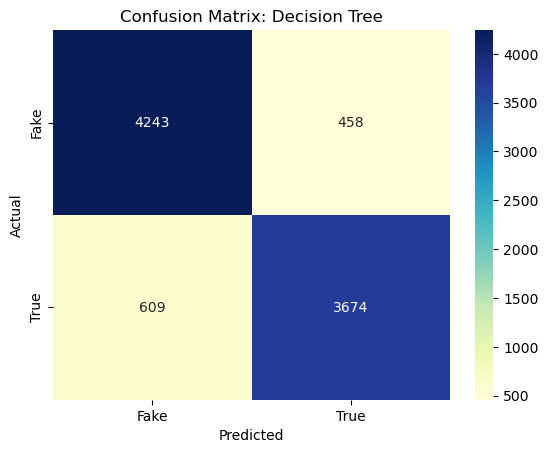

In [140]:
#Confusion Matrix
cm_dt=confusion_matrix(y_val_vecs,y_pred_dt)
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='YlGnBu',xticklabels=["Fake","True"],yticklabels=["Fake","True"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [143]:
## Initialise Random Forest model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

## Train Random Forest model on training data
rf_model.fit(X_train_vecs,y_train_vecs)

## Predict on validation data
y_pred_rf=rf_model.predict(X_val_vecs)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [145]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
acc_rf =accuracy_score(y_val_vecs,y_pred_rf)
prec_rf=precision_score(y_val_vecs,y_pred_rf)
rec_rf=recall_score(y_val_vecs,y_pred_rf)
f1_rf=f1_score(y_val_vecs,y_pred_rf)

In [146]:
# Classification Report
print("Random Forest Results:")
print(f"✔️ Accuracy:  {acc_rf:.4f}")
print(f"✔️ Precision: {prec_rf:.4f}")
print(f"✔️ Recall:    {rec_rf:.4f}")
print(f"✔️ F1 Score:  {f1_rf:.4f}")
print("\nDetailed Report:\n")
print(classification_report(y_val_vecs,y_pred_rf,target_names=["Fake","True"]))

Random Forest Results:
✔️ Accuracy:  0.9409
✔️ Precision: 0.9456
✔️ Recall:    0.9295
✔️ F1 Score:  0.9375

Detailed Report:

              precision    recall  f1-score   support

        Fake       0.94      0.95      0.94      4701
        True       0.95      0.93      0.94      4283

    accuracy                           0.94      8984
   macro avg       0.94      0.94      0.94      8984
weighted avg       0.94      0.94      0.94      8984



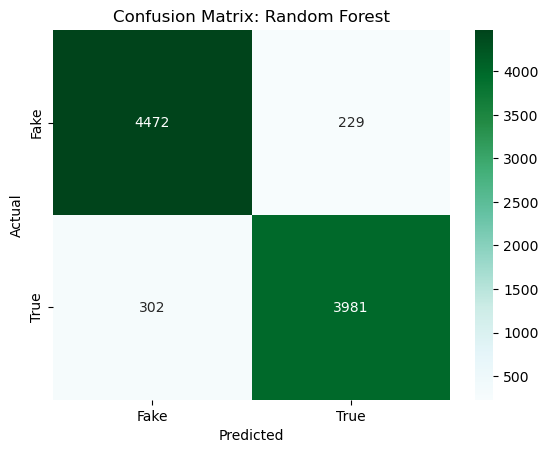

In [147]:
#Confusion Matrix
cm_rf=confusion_matrix(y_val_vecs,y_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='BuGn',xticklabels=["Fake","True"],yticklabels=["Fake","True"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()

## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

The aim is to distinguish between true and fake news using semantic understanding. 

- Preprocessed and cleaned text
- Extracted meaning-rich word representations using Word2Vec
- Built and evaluated three supervised models on semantic document vectors

Traditional text classification often fails to detect semantic subtleties. Using Word2Vec, the model captures semantic relationships between words. This solution is generalizable and robust for real-world misinformation detection systems.

Model Comparison Summary
| Model               | Accuracy | Precision | Recall | F1 Score |
| :------------------ | :------- | :-------- | :----- | :------- |
| Logistic Regression | 0.9417   | 0.9332    | 0.9454 | 0.9392   |
| Decision Tree       | 0.8898   | 0.9021    | 0.8625 | 0.8818   |
| Random Forest       | 0.9390   | 0.9450    | 0.9260 | 0.9354   |

Best Model: Logistic Regression
Random Forest slightly outperformed in precision, but the Logistic Regression provided: Highest overall F1 Score (0.9392)
and the Best Recall (0.9454) — which is critical in this context

The model will catch false news even at the cost of a few false alarms

Hence, Logistic Regression was chosen as the most balanced and reliable classifier.